# Heart Dease Prediction using Logistic Regression, Random Forest, Naive Bayes, KNN, Decision Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import and read the heart disease dataset
data = pd.read_csv("heart_project.csv")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
# print the shape and data type of the dataframe
data.shape

(1025, 14)

### The original dataset has 1025 rows and 14 columns 
[Because the dataset is in numeric type so we can obviously use this to analyze.]

### Note: do bình thường data sẽ ở dạng chữ (text,..) hoặc số (numeric) nên nếu nó là text thì mình phải decode nó về dạng số để phân tích nhưng do data heart này là kiểu số nên mình sẽ bỏ qua bước decode.

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
data.describe()
#Note: đối với các thông số count, mean,... là gì thì có thể search để hiểu thêm, ở đây mình sẽ xem từng thuộc tính (từng cột) nó nằm trong khoảng nào.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Thông tin về từng thuộc tính trong tập dữ liệu

1. age: The person's age in years

2. sex: The person's sex (1 = male, 0 = female)

3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5. chol: The person's cholesterol measurement in mg/dl

6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. thalach: The person's maximum heart rate achieved

9. exang: Exercise induced angina (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12. ca: The number of major vessels (0-3)

13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14. target: Heart disease (0 = no, 1 = yes)

Heart disease risk factors to the following: high cholesterol, high blood pressure, diabetes, weight, family history and smoking . 

According to another source , the major factors that can't be changed are: increasing age, male gender and heredity. 

Note that thalassemia, one of the variables in this dataset, is heredity. 

Major factors that can be modified are: Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes. 

Other factors include stress, alcohol and poor diet/nutrition.

In [8]:
#check whether the dataset has null value or not
data.isnull().sum()
#Note: dữ liệu không bị rỗng hay chứa các kí tự N/A

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
data.isnull().sum().sum()

0

### So, we have no missing values 

In [10]:
# Dùng hàm corr() để kiểm tra sự tương quan giữa thuộc tính "target" với các thuộc tính còn lại
# Correlation coefficient càng lớn thì 2 thuộc tính có độ tương quan càng mạnh
print(data.corr()["target"].abs().sort_values(ascending=False))
# Note: Nhận thấy thuộc tính "fbs" có độ tương quan thấp nhất so với so với các thuộc tính còn lại

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


### This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

# Exploratory Data Analysis (EDA)

In [11]:
# Chọn cột "target" là cột đưa ra quyết định
y = data["target"]

1    526
0    499
Name: target, dtype: int64


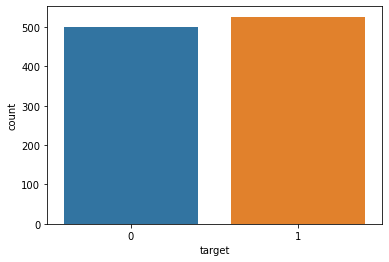

In [12]:
ax = sns.countplot(data["target"])
target_temp = data.target.value_counts()
print(target_temp)
# Biểu đồ cho thấy có tổng cộng 526 trường hợp là mắc bệnh tim và 499 trường hợp còn lại là không mắc bệnh tim

1    526
0    499
Name: target, dtype: int64


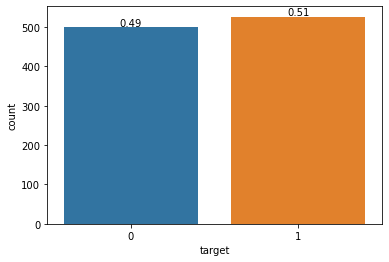

In [13]:
ax = sns.countplot(data["target"])
target_temp = data.target.value_counts()
print(target_temp)

total = float(len(data["target"]))
# for showing the percentage
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

From the total dataset of 303 patients, 165 (54%) have a heart disease (target=1)

# Percentage of patient with or without heart problems in the given dataset

In [14]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/1025,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/1025,2)))
# Note: Cho biết phần trăm bệnh nhân mắc vấn đề tim mạch

Percentage of patience without heart problems: 48.68
Percentage of patience with heart problems: 51.32


In [15]:
# Biểu đồ trước mình chỉ plot chung chung bệnh nhân, ở biểu đồ này sẽ plot chi tiết dựa trên giới tính là Nam và Nữ
data["sex"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='sex', ylabel='target'>

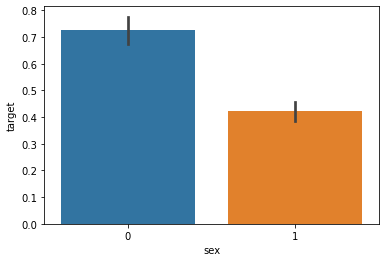

In [16]:
# Với 0 là nữ và 1 là nam
sns.barplot(data["sex"],data["target"])

### Here 0 is female and 1 is male patients

In [17]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:30.44%
Percentage of Male Patients:69.56%


In [18]:
# Đây là những thuộc tính thuộc dạng categorical data => thay vì data ban đầu đang là kiểu số thì mình sẽ chuyển nó về
# dạng label để khi visualize lên biểu đồ có thể quan sát rõ hơn
categorial = [('sex', ['female', 'male']), 
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']), 
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']), 
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']), 
              ('exang', ['yes', 'no']), 
              ('slope', ['upsloping', 'flat', 'downsloping']), 
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]

In [19]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)] 

In [20]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=data, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=data, ax=axes[ax_index][1])
    avg = data[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)

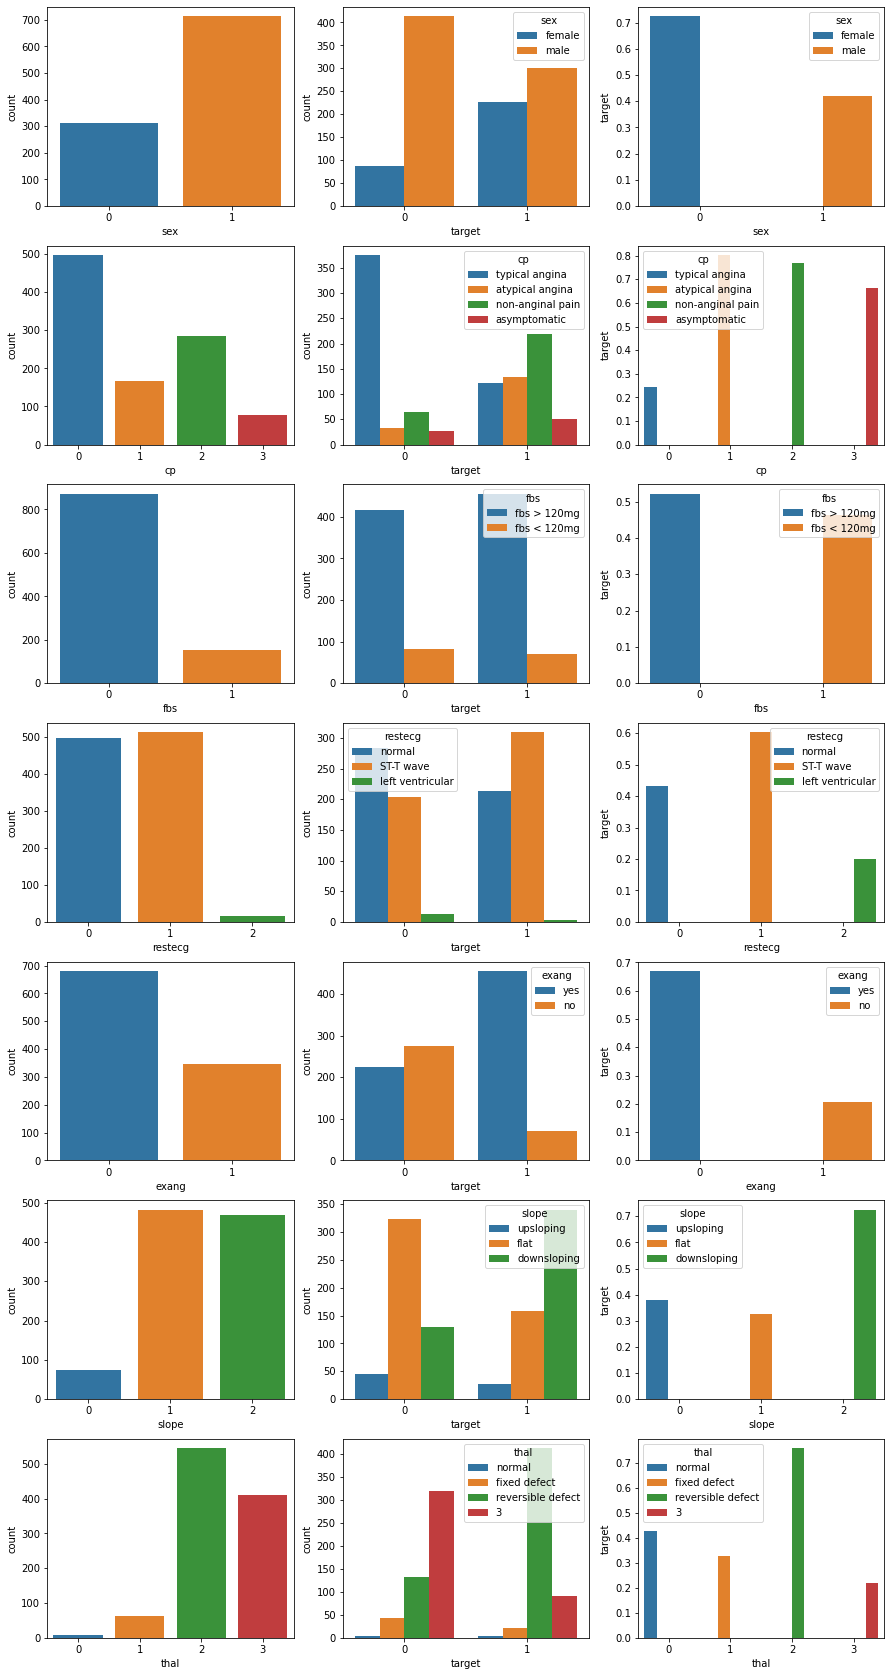

In [21]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(isCategorial=True)
# Cách đọc: ở category mình sẽ có tổng cộng là 7 thuộc tính. 
# Thuộc tính thứ nhất là sex (xem ở 3 biểu đồ nằm ngang đầu tiên)
# Biểu đồ 1.1: với sex là x, count là trục y, nếu là female thì sẽ có số lượng người mắc bệnh là bao nhiêu, male thì bao nhiêu
# Biểu đồ 1.2: với target là trục x, count là trục y, ở giá trị 0 (số người mắc bệnh) thì có bao nhiêu nam, bao nhiêu nữ, tương tự cho ở giá trị 1
# Biểu đồ 1.3: tương tự ở trên nhưng nó sẽ tính = % ở trục y

In [22]:
# Đối với những thuộc tính thuộc dạng continuous data => Không dùng count như category data mà ở đây mình sẽ xét dựa trên mật độ
continuous = [('trestbps', 'blood pressure in mm Hg'), 
              ('chol', 'serum cholestoral in mg/d'), 
              ('thalach', 'maximum heart rate achieved'), 
              ('oldpeak', 'ST depression by exercise relative to rest'), 
              ('ca', '# major vessels: (0-3) colored by flourosopy')]

In [23]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(data[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=data, ax=axes[ax_index][1])

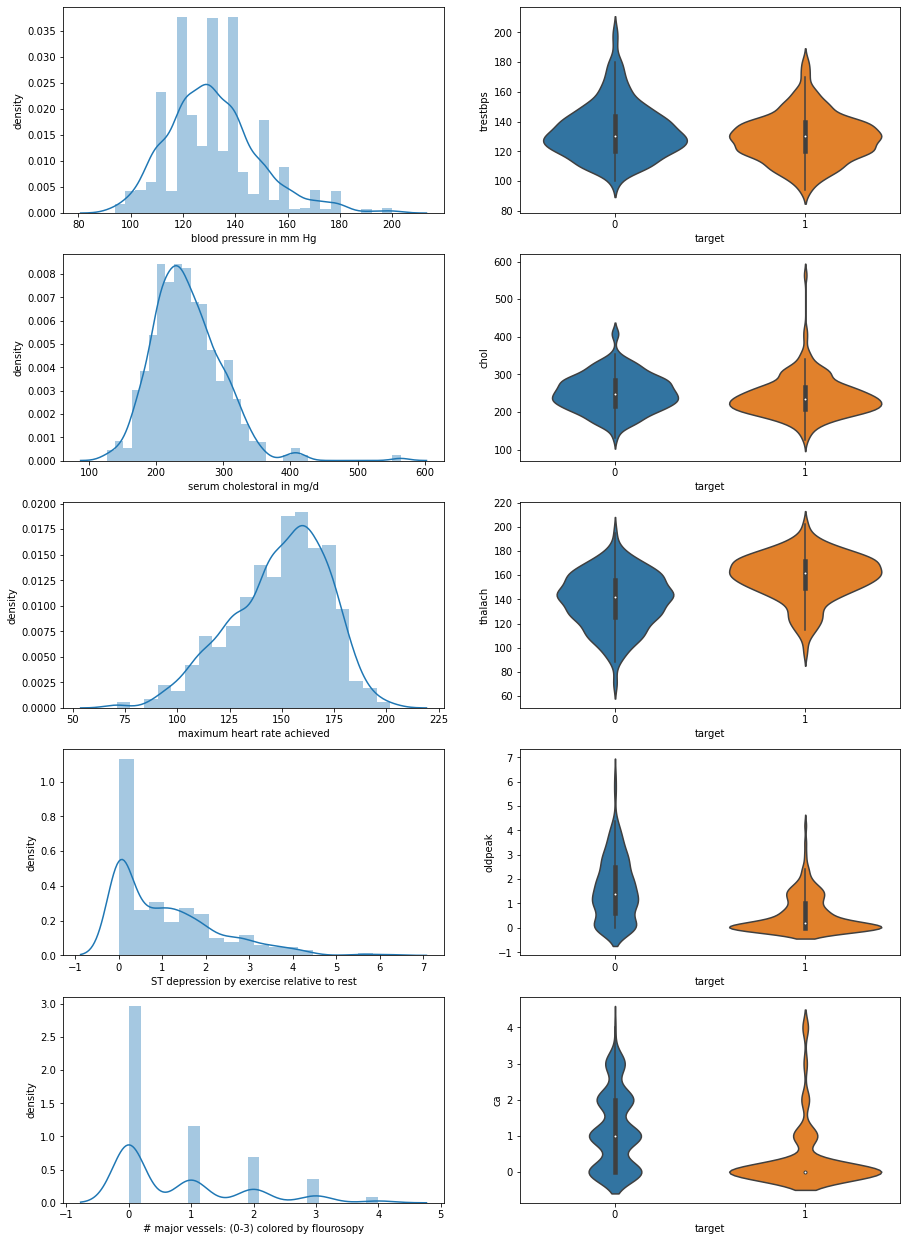

In [24]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))

plotGrid(isCategorial=False)

# Cách đọc: mn tự tìm hiểu cách đọc nha. Keywords: density plot, kernel density estimation

# Heart Disease Frequency for ages

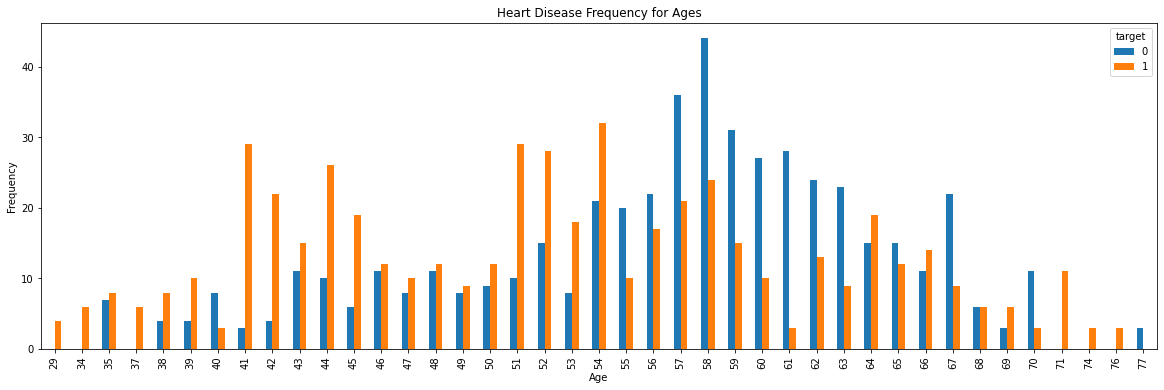

In [25]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

# Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)

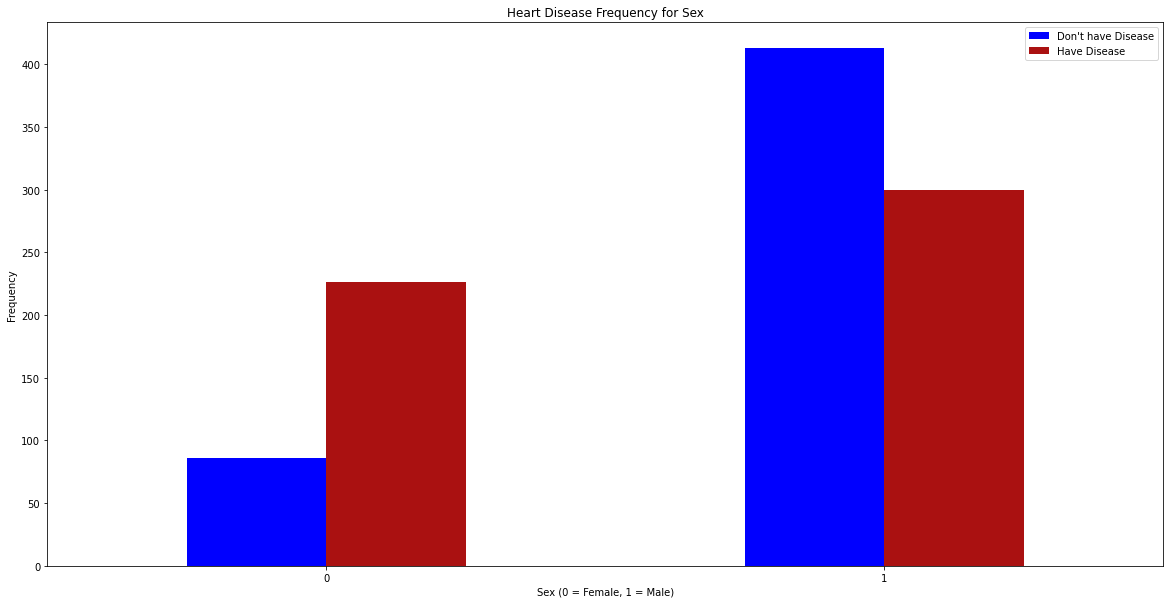

In [26]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

# Heart disease according to Fasting Blood sugar 

In [27]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [28]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


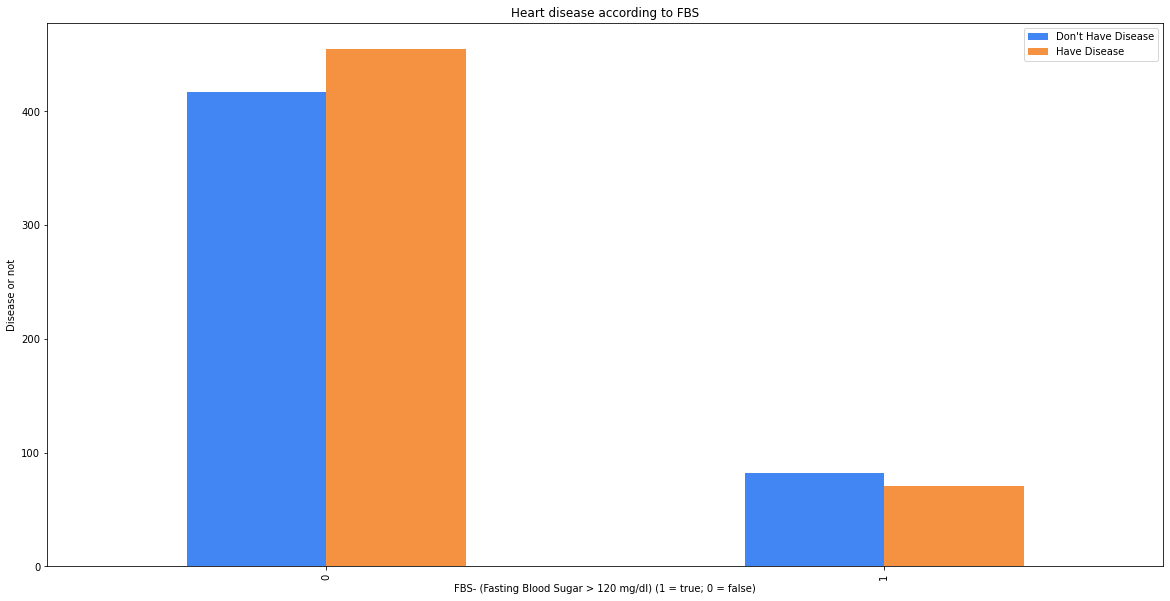

In [29]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

# Analysing the chest pain (4 types of chest pain)

### [Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic]

In [30]:
data["chest_pain_type"].unique()

array([0, 1, 2, 3], dtype=int64)

In [31]:
y = data["target"]
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

<AxesSubplot:xlabel='chest_pain_type', ylabel='target'>

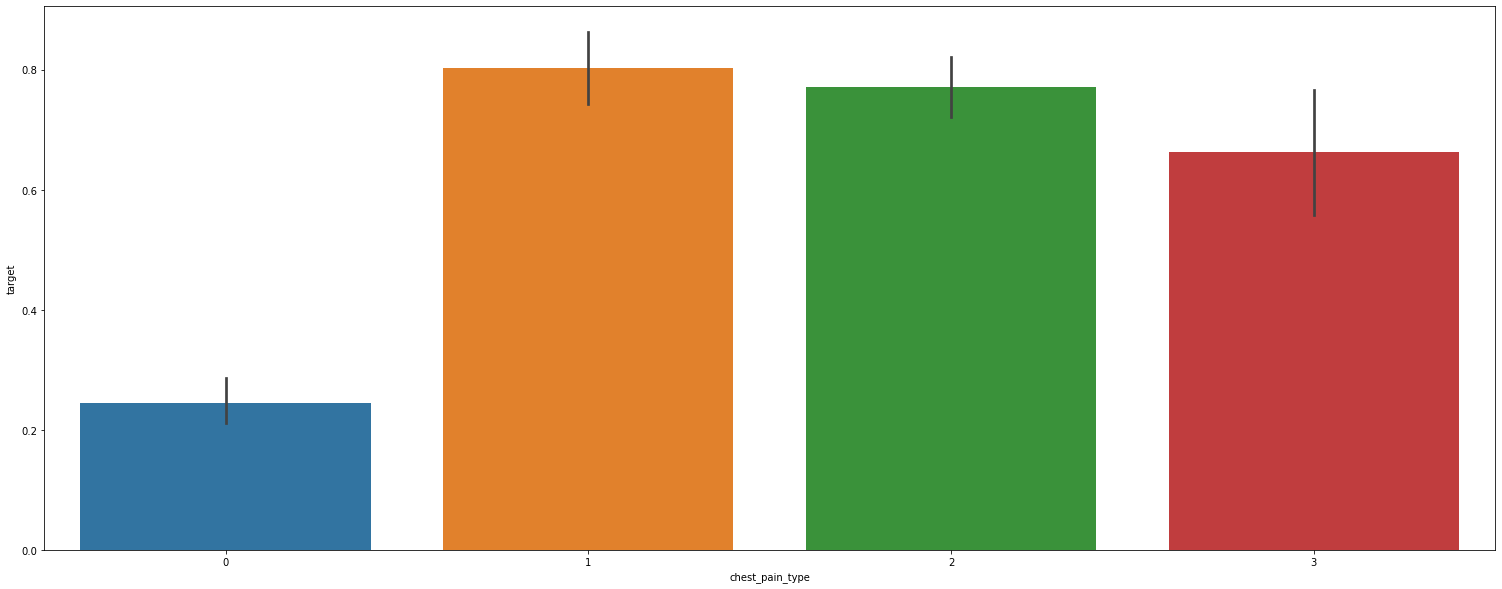

In [32]:
plt.figure(figsize=(26, 10))
sns.barplot(data["chest_pain_type"],y)

# Analysing The person's resting blood pressure (mm Hg on admission to the hospital)

In [33]:
data["resting_blood_pressure"].unique()

array([125, 140, 145, 148, 138, 100, 114, 160, 120, 122, 112, 132, 118,
       128, 124, 106, 104, 135, 130, 136, 180, 129, 150, 178, 146, 117,
       152, 154, 170, 134, 174, 144, 108, 123, 110, 142, 126, 192, 115,
        94, 200, 165, 102, 105, 155, 172, 164, 156, 101], dtype=int64)

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='target'>

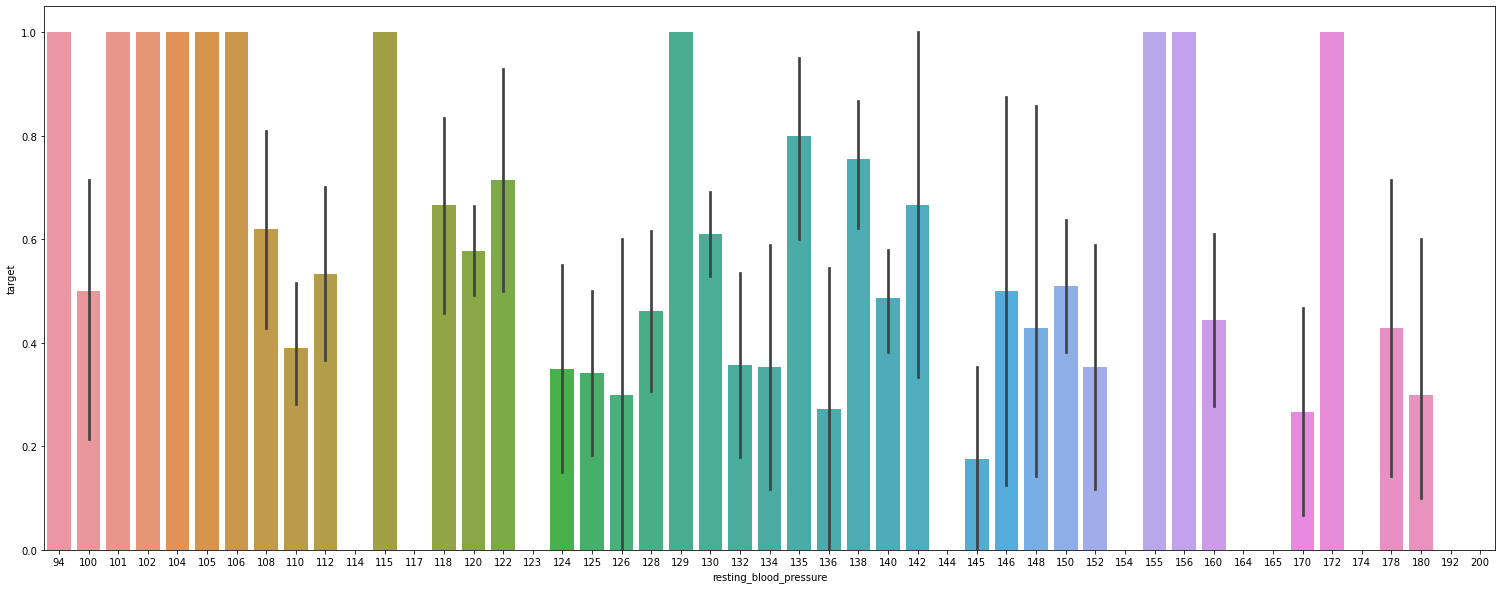

In [34]:
plt.figure(figsize=(26, 10))
sns.barplot(data["resting_blood_pressure"],y)

# Analysing the Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

In [35]:
data["rest_ecg"].unique()

array([1, 0, 2], dtype=int64)

<AxesSubplot:xlabel='rest_ecg', ylabel='target'>

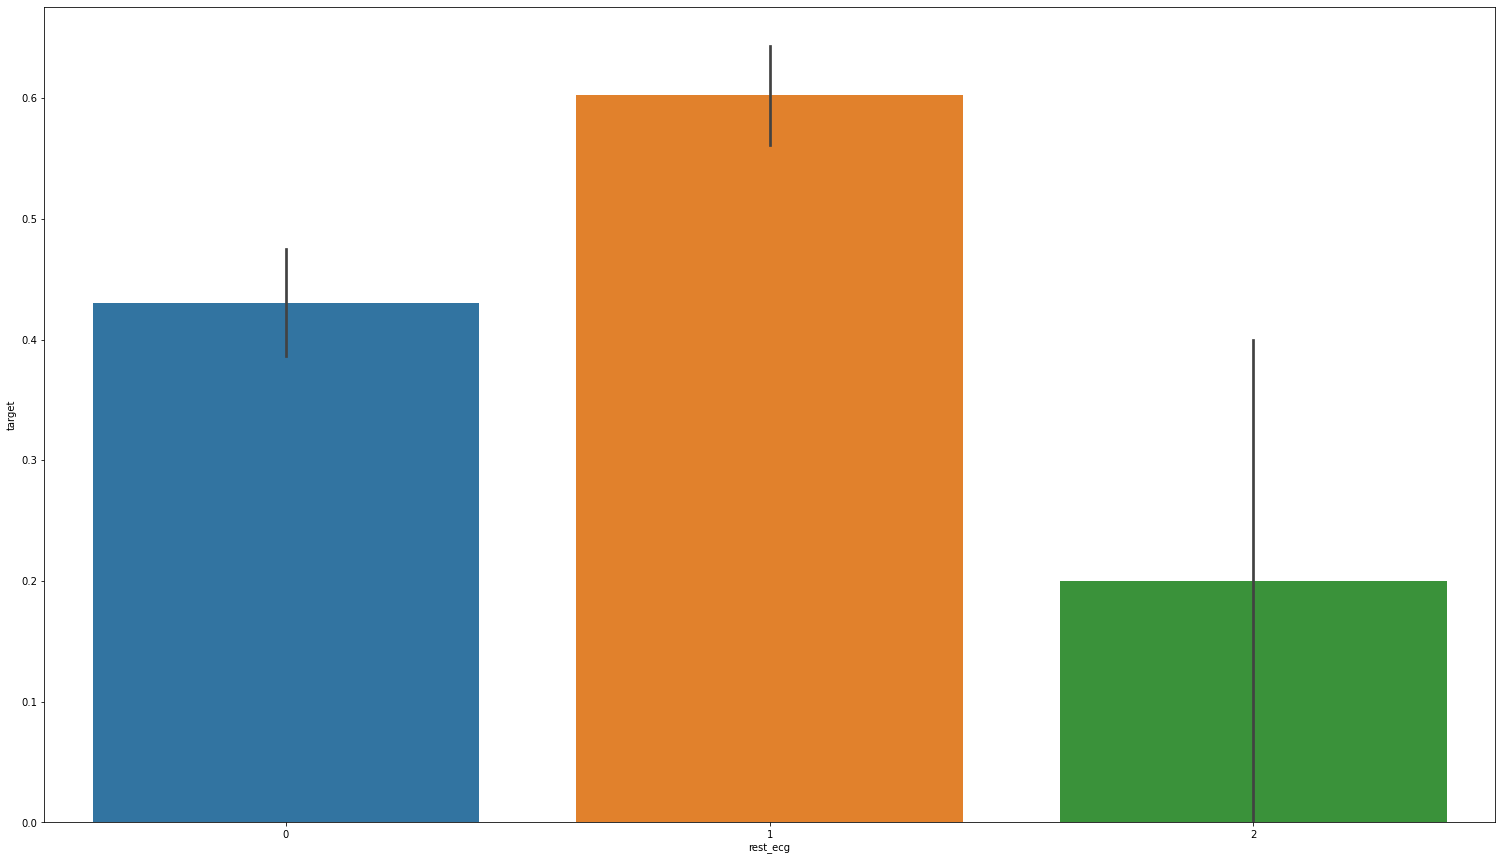

In [36]:
plt.figure(figsize=(26, 15))
sns.barplot(data["rest_ecg"],y)

## people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

# Analysing Exercise induced angina (1 = yes; 0 = no)

In [37]:
data["exercise_induced_angina"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exercise_induced_angina', ylabel='target'>

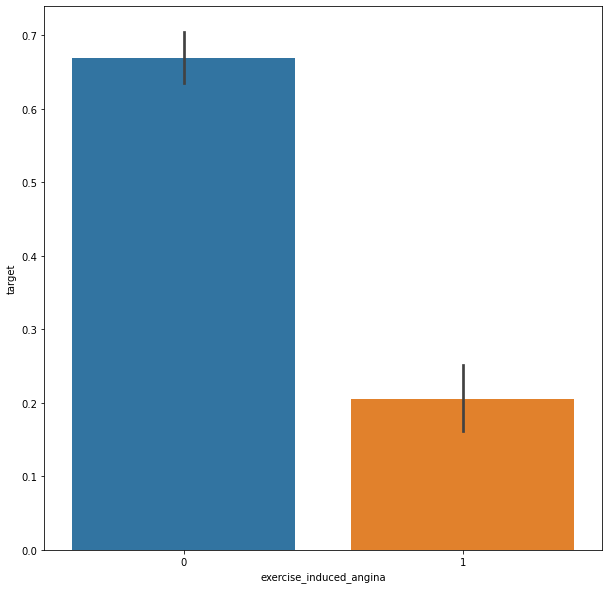

In [38]:
plt.figure(figsize=(10, 10))
sns.barplot(data["exercise_induced_angina"],y)

### People with exercise_induced_angina=1 are much less likely to have heart problems

# Analysing the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

In [39]:
data["st_slope"].unique()

array([2, 0, 1], dtype=int64)

<AxesSubplot:xlabel='st_slope', ylabel='target'>

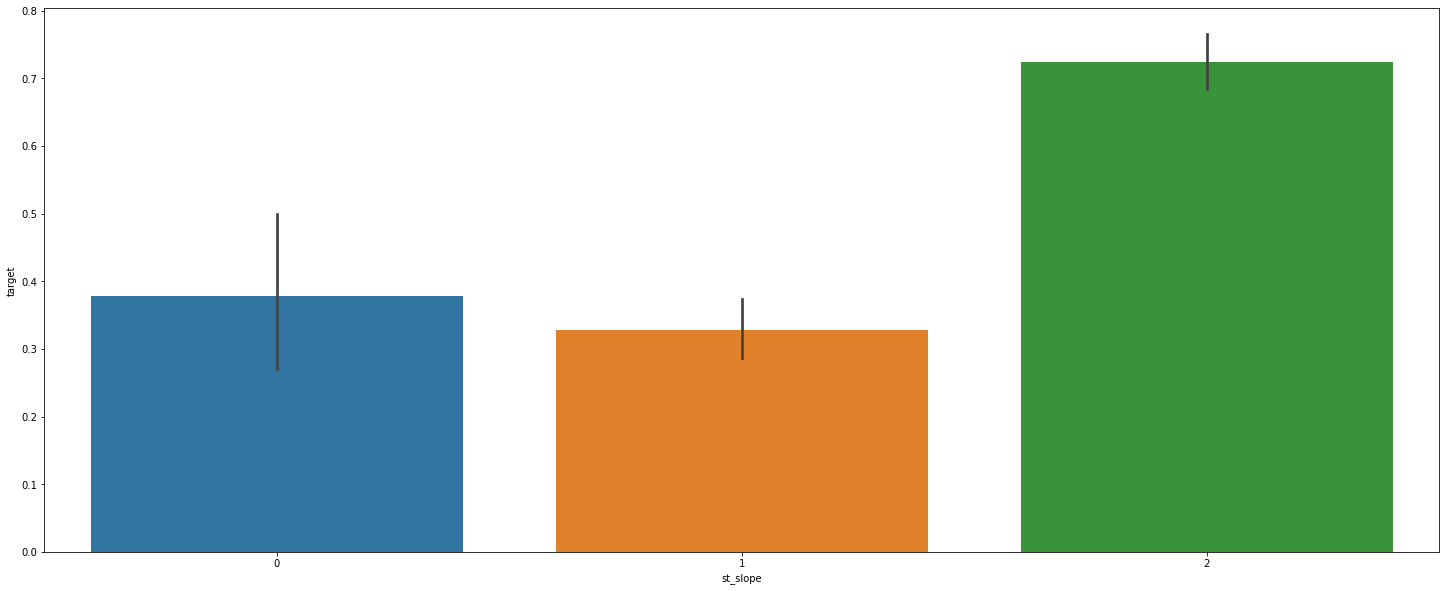

In [40]:
plt.figure(figsize=(25, 10))
sns.barplot(data["st_slope"],y)

Slope '2' causes heart pain much more than Slope '0' and '1'

# Analysing number of major vessels (0-3) colored by flourosopy

In [41]:
data["num_major_vessels"].unique()

array([2, 0, 1, 3, 4], dtype=int64)

### count num_major vessels

<AxesSubplot:xlabel='num_major_vessels', ylabel='count'>

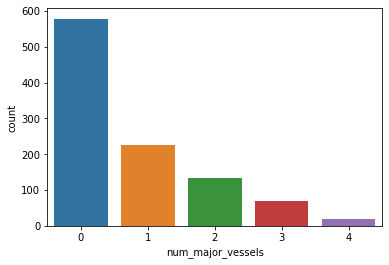

In [42]:
sns.countplot(data["num_major_vessels"])

### comparing with target

<AxesSubplot:xlabel='num_major_vessels', ylabel='target'>

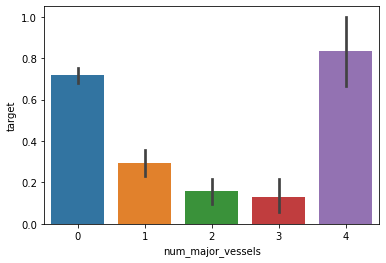

In [43]:
sns.barplot(data["num_major_vessels"],y)

### num_major_vessels=4 has astonishingly large number of heart patients

# Analysing A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)



In [44]:
data["thalassemia"].unique()

array([3, 2, 1, 0], dtype=int64)

### plotting the thalassemia distribution (0,1,2,3)

<AxesSubplot:xlabel='thalassemia', ylabel='Density'>

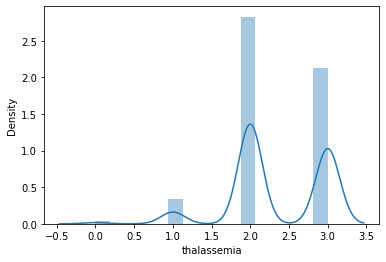

In [45]:
sns.distplot(data["thalassemia"])

### comparing with target

<AxesSubplot:xlabel='thalassemia', ylabel='target'>

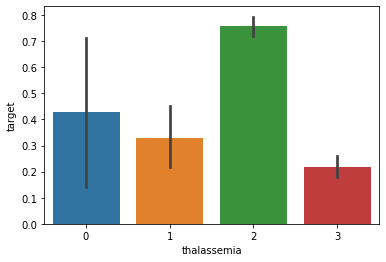

In [46]:
sns.barplot(data["thalassemia"],y)

# thalassemia and cholesterol scatterplot

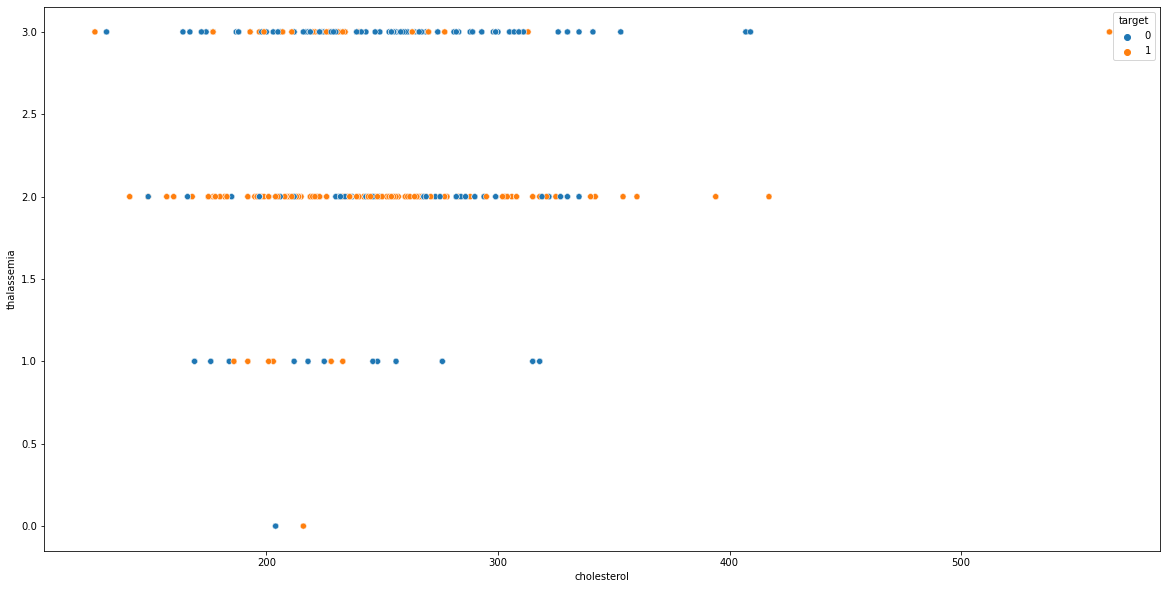

In [47]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='cholesterol',y='thalassemia',data=data,hue='target')
plt.show()

# thalassemia vs resting blood pressure scatterplot

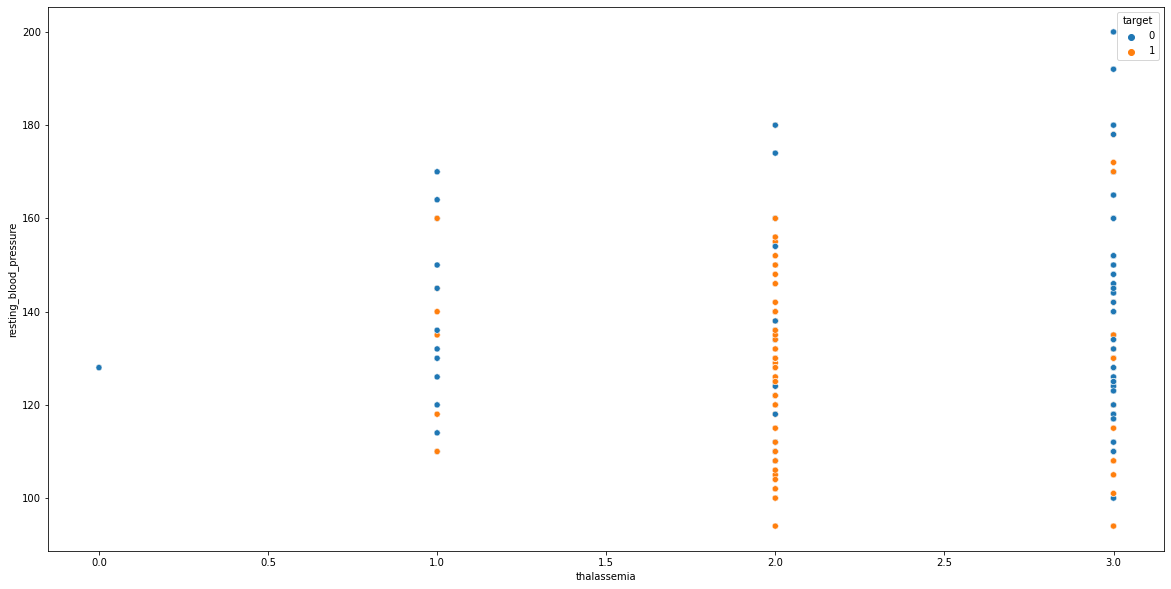

In [48]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='thalassemia',y='resting_blood_pressure',data=data,hue='target')
plt.show()

## Health rate vs age

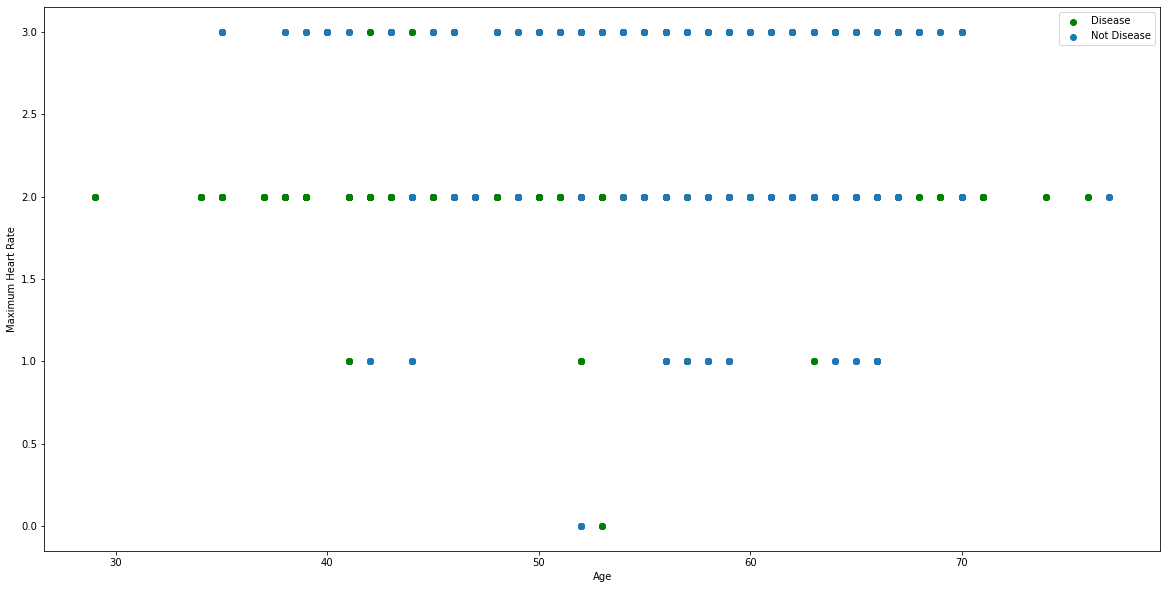

In [49]:
plt.figure(figsize=(20, 10))
plt.scatter(x=data.age[data.target==1], y=data.thalassemia[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalassemia[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

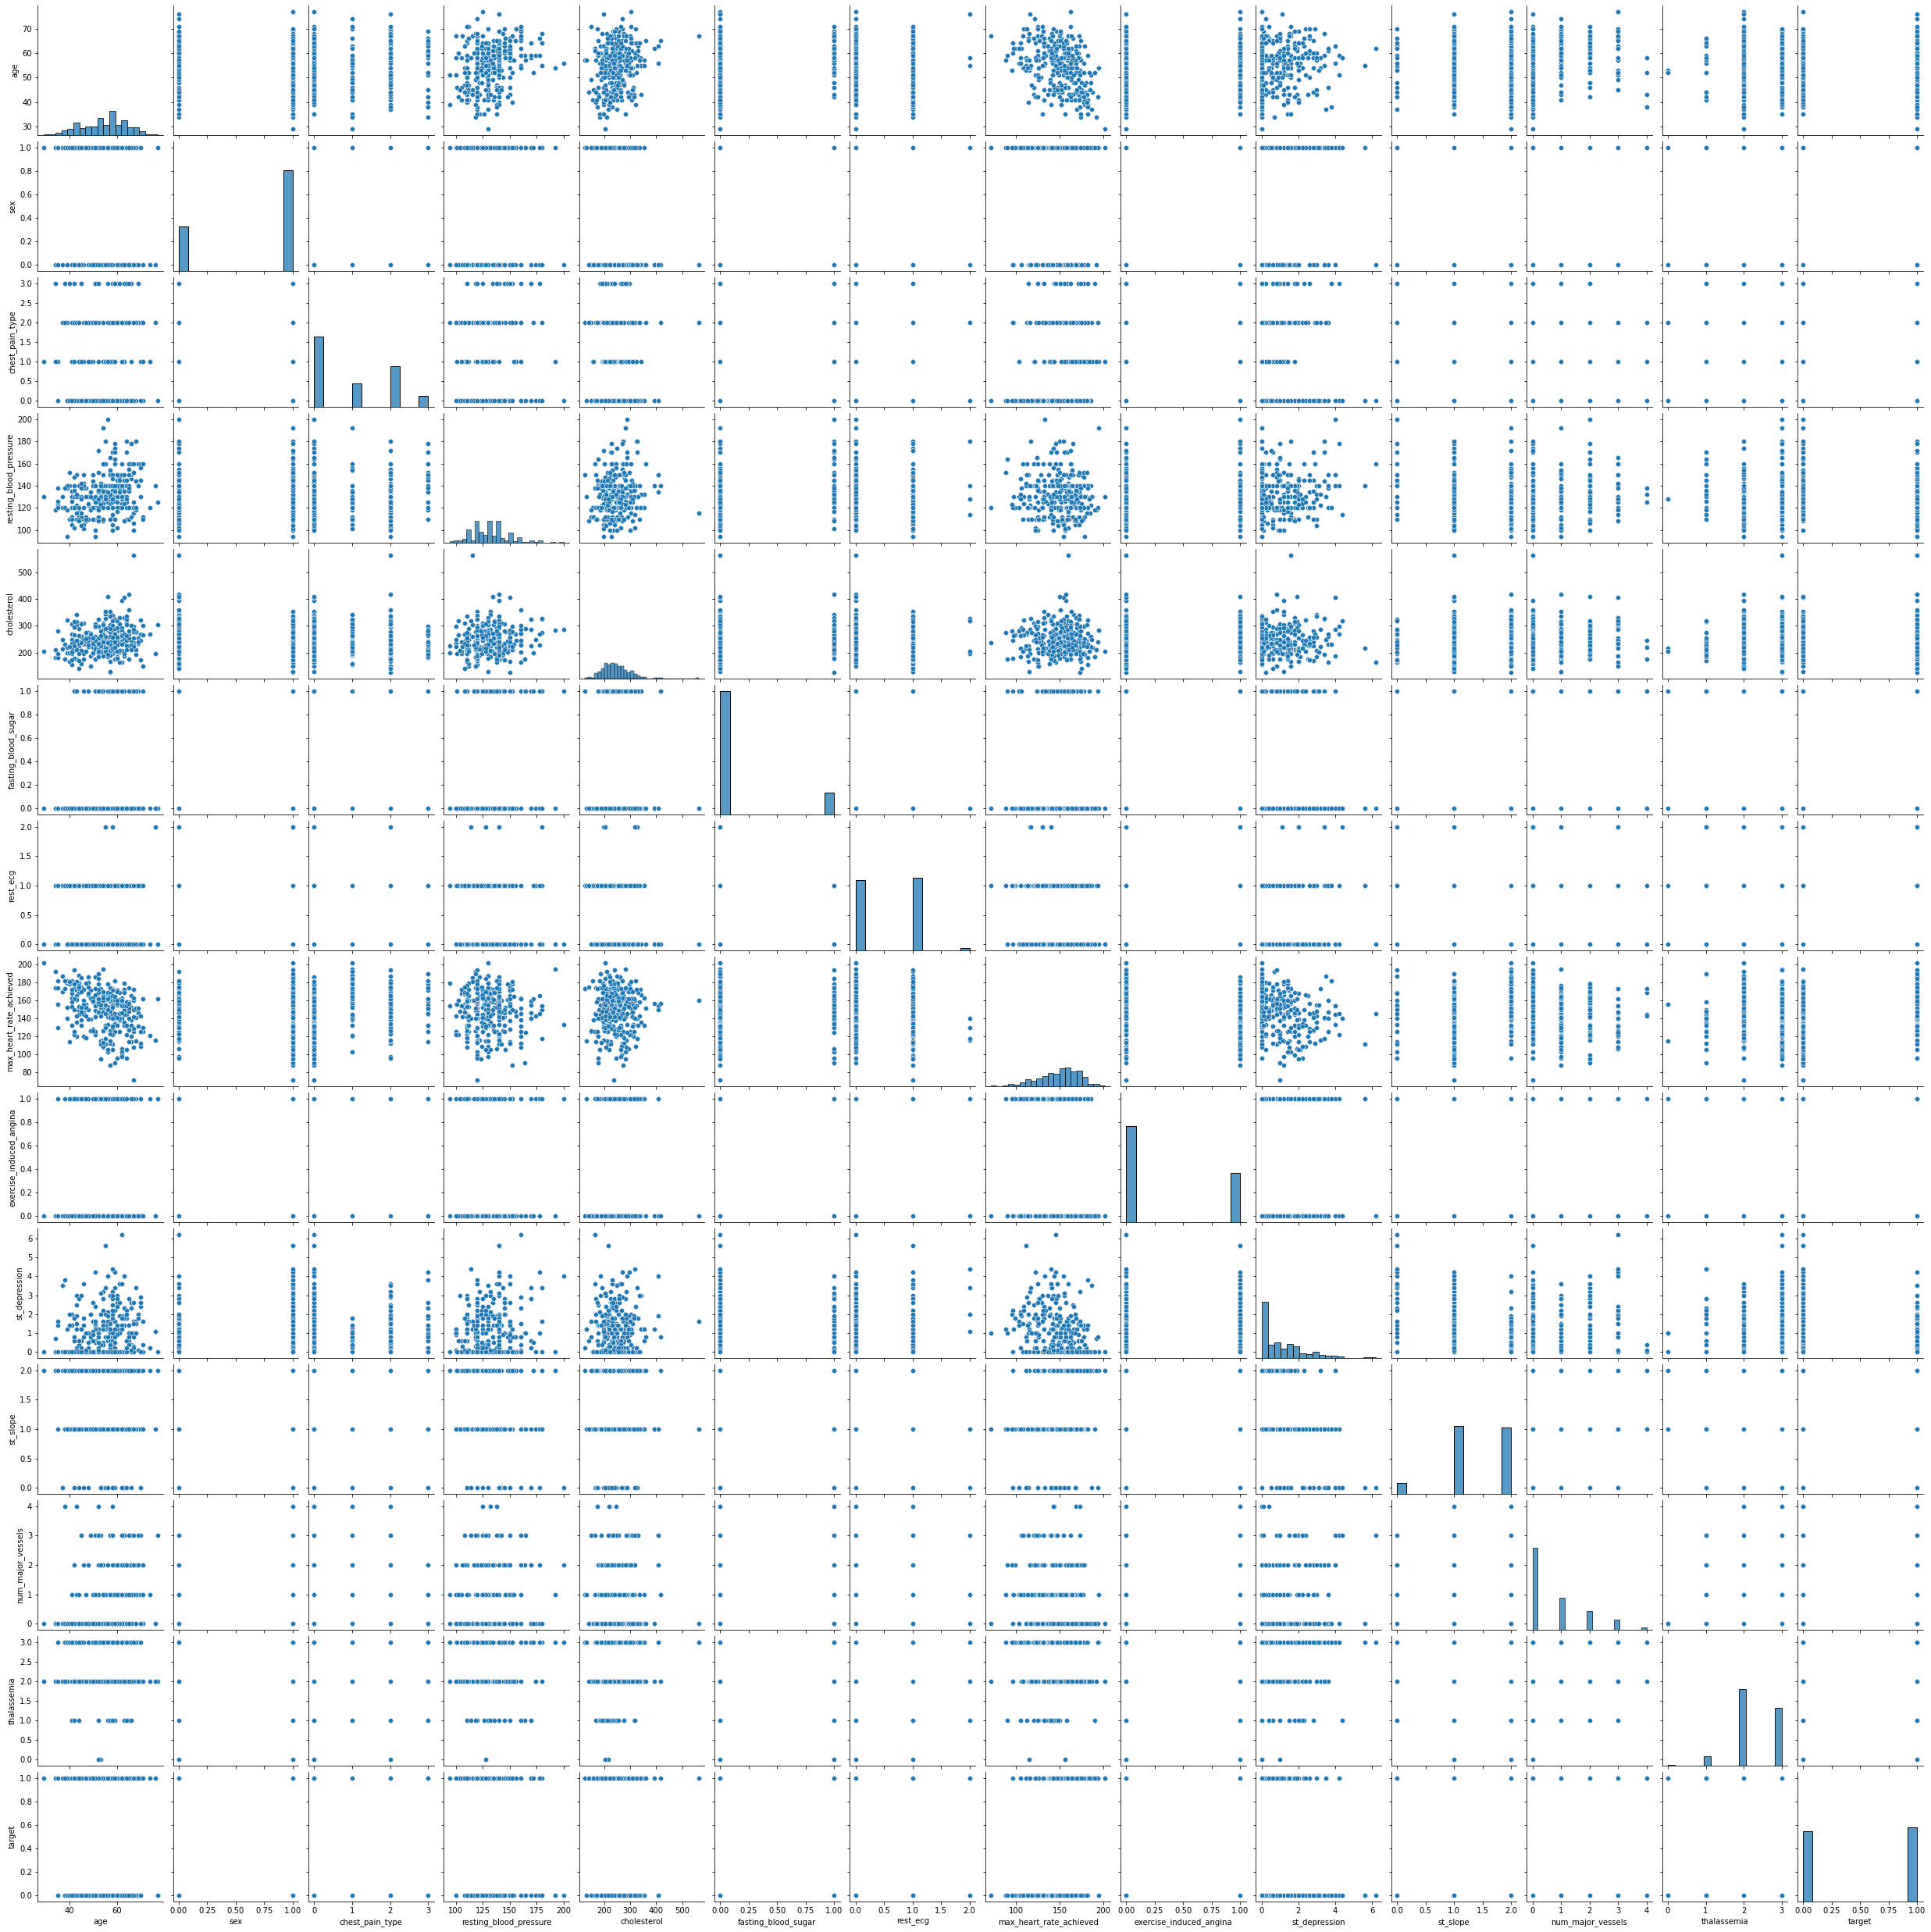

In [50]:
sns.pairplot(data=data)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'chest_pain_type'}>,
        <AxesSubplot:title={'center':'resting_blood_pressure'}>],
       [<AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'fasting_blood_sugar'}>,
        <AxesSubplot:title={'center':'rest_ecg'}>,
        <AxesSubplot:title={'center':'max_heart_rate_achieved'}>],
       [<AxesSubplot:title={'center':'exercise_induced_angina'}>,
        <AxesSubplot:title={'center':'st_depression'}>,
        <AxesSubplot:title={'center':'st_slope'}>,
        <AxesSubplot:title={'center':'num_major_vessels'}>],
       [<AxesSubplot:title={'center':'thalassemia'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

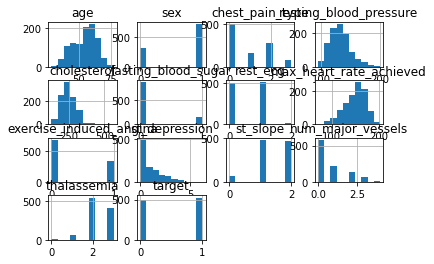

In [51]:
data.hist()

# Correlation plot

Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables (e.g. height and weight)

In [52]:
# store numeric variables in cnames
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

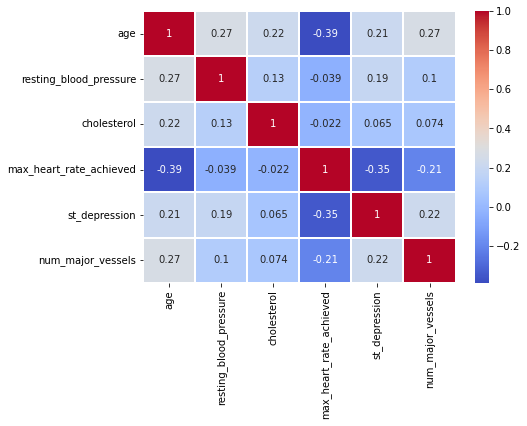

In [53]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = data.loc[:,cnames]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

### Correlation analysis

In [54]:
df_corr = data.loc[:,cnames]
df_corr

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
0,52,125,212,168,1.0,2
1,53,140,203,155,3.1,0
2,70,145,174,125,2.6,0
3,61,148,203,161,0.0,1
4,62,138,294,106,1.9,3
...,...,...,...,...,...,...
1020,59,140,221,164,0.0,0
1021,60,125,258,141,2.8,1
1022,47,110,275,118,1.0,1
1023,50,110,254,159,0.0,0


# Splitting the dataset to Train and Test

In [55]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 820 records and Testing features have 205 records.


In [56]:
X_train.shape

(820, 13)

In [57]:
X_test.shape

(205, 13)

In [58]:
Y_train.shape

(820,)

In [59]:
Y_test.shape

(205,)

## importing Accuracy score

In [60]:
from sklearn.metrics import accuracy_score

# Modelling and predicting with Machine Learning
The main goal of the entire project is to predict heart disease occurrence with the highest accuracy. In order to achieve this, we will test several classification algorithms. This section includes all results obtained from the study and introduces the best performer according to accuracy metric. I have chosen several algorithms typical for solving supervised learning problems throughout classification methods.

First of all, let's equip ourselves with a handy tool that benefits from the cohesion of SciKit Learn library and formulate a general function for training our models. The reason for displaying accuracy on both, train and test sets, is to allow us to evaluate whether the model overfits or underfits the data (so-called bias/variance tradeoff).

In [61]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

# Logistic regression

In [62]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

y_pred_lr = logreg.predict(X_test)
print(y_pred_lr)

[1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0
 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1]


In [63]:
score_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %


In [64]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = train_model(X_train, Y_train, X_test, Y_test, LogisticRegression)

Train accuracy: 86.22%
Test accuracy: 86.34%


In [65]:
#Logistic Regression supports only solvers in ['liblinear', 'newton-cg'<-93.44, 'lbfgs'<-91.8, 'sag'<-72.13, 'saga'<-72.13]
clf = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial').fit(X_test, Y_test)
#The solver for weight optimization.
#'lbfgs' is an optimizer in the family of quasi-Newton methods.
clf.score(X_test, Y_test)

0.8975609756097561

# Confusion Matrix

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
matrix= confusion_matrix(Y_test, y_pred_lr)

<AxesSubplot:>

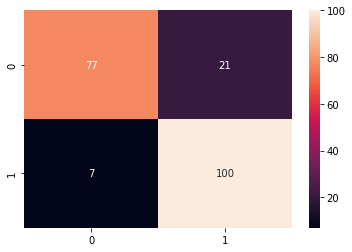

In [68]:
sns.heatmap(matrix,annot = True, fmt = "d")

fmt = d is format = default

# precision Score

In [69]:
from sklearn.metrics import precision_score

In [70]:
precision = precision_score(Y_test, y_pred_lr)

In [71]:
print("Precision: ",precision)

Precision:  0.8264462809917356


# Recall

In [72]:
from sklearn.metrics import recall_score

In [73]:
recall = recall_score(Y_test, y_pred_lr)

In [74]:
print("Recall is: ",recall)

Recall is:  0.9345794392523364


# F-Score

balance of precision and recall score

In [75]:
print((2*precision*recall)/(precision+recall))

0.8771929824561404


cm using bad style

In [76]:
CM =pd.crosstab(Y_test, y_pred_lr)
CM

col_0,0,1
target,,
0,77,21
1,7,100


In [77]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

false negative

In [78]:
fnr=FN*100/(FN+TP)
fnr

6.542056074766355

# Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, Y_train)

y_pred_rf = randfor.predict(X_test)
print(y_pred_rf)

[1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1]


# Learning curve for Training score & cross validation score

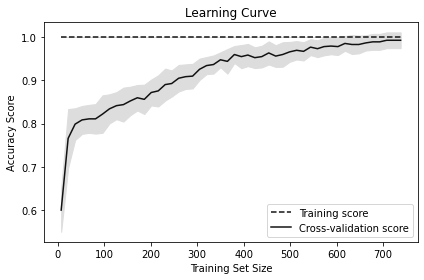

In [80]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        X_train, 
                                                        Y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [81]:
score_rf = round(accuracy_score(y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 100.0 %


In [82]:
#Random forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


Now, let us prune the depth of trees and check the accuracy.

In [83]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, Y_test)))

Accuracy on training set: 0.885
Accuracy on test set: 0.902


performance metrics
-Accuracy: is the ratio between the number of correct predictions and total number of predications.

$acc = \frac{TP + TN}{TP + TN + FP + FN}$

-Precision: is the ratio between the number of correct positives and the number of true positives plus the number of false positives.

$Precision (p) = \frac{TP}{TP + FP}$

-Recall: is the ratio between the number of correct positives and the number of true positives plus the number of false negatives.

$recall = \frac{TP}{TP + FN}$

-F-score: is known as the harmonic mean of precision and recall.

$acc = \frac{1}{\frac{1}{2}(\frac{1}{p}+\frac{1}{r})} = \frac{2pr}{p+r}$

-Problem characteristics in context of our case study:

TP = True positive (has heart disease). TN = True negative (has no heart disease). FP = False positive (has no heart disease) FN = False negative (has heart disease)

## confusion matrix of Random Forest

In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
matrix= confusion_matrix(Y_test, y_pred_rf)

<AxesSubplot:>

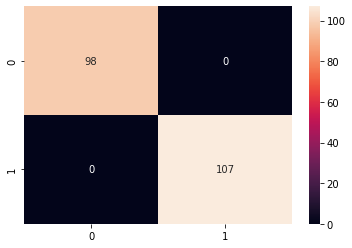

In [86]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [87]:
from sklearn.metrics import precision_score

In [88]:
precision = precision_score(Y_test, y_pred_rf)

In [89]:
print("Precision: ",precision)

Precision:  1.0


# recall

In [90]:
from sklearn.metrics import recall_score

In [91]:
recall = recall_score(Y_test, y_pred_rf)

In [92]:
print("Recall is: ",recall)

Recall is:  1.0


# F score

In [93]:
print((2*precision*recall)/(precision+recall))

1.0


### cm using bad style

In [94]:
CM =pd.crosstab(Y_test, y_pred_rf)
CM

col_0,0,1
target,,
0,98,0
1,0,107


In [95]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## False negative rate of the model

In [96]:
fnr=FN*100/(FN+TP)
fnr

0.0

# Naive Bayes

In [97]:
from sklearn.naive_bayes import GaussianNB
nb = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

nb.fit(X_train, Y_train)

y_pred_nb = nb.predict(X_test)
print(y_pred_nb)

Train accuracy: 82.07%
Test accuracy: 85.37%
[1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1
 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0
 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1]


In [98]:
score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.37 %


In [99]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

Train accuracy: 82.07%
Test accuracy: 85.37%


## confusion matrix of Naive Bayes

In [100]:
from sklearn.metrics import confusion_matrix

In [101]:
matrix= confusion_matrix(Y_test, y_pred_nb)

<AxesSubplot:>

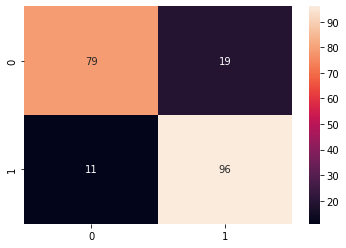

In [102]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [103]:
from sklearn.metrics import precision_score

In [104]:
precision = precision_score(Y_test, y_pred_nb)

In [105]:
print("Precision: ",precision)

Precision:  0.8347826086956521


# recall

In [106]:
from sklearn.metrics import recall_score

In [107]:
recall = recall_score(Y_test, y_pred_nb)

In [108]:
print("Recall is: ",recall)

Recall is:  0.897196261682243


# f score

In [109]:
print((2*precision*recall)/(precision+recall))

0.8648648648648648


### bad cm style

In [110]:
CM = pd.crosstab(Y_test, y_pred_nb)
CM

col_0,0,1
target,,
0,79,19
1,11,96


In [111]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## false negative rate of the model

In [112]:
fnr = FN*100/(FN+TP)
fnr

10.280373831775702

# KNN(K Nearest Neighbors)

In [113]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=8)

knn.fit(X_train, Y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

Train accuracy: 78.66%
Test accuracy: 73.66%
[1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1
 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0
 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1
 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0]


In [114]:
score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 73.66 %


In [115]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier)

Train accuracy: 91.71%
Test accuracy: 74.63%


Let's see if KNN can perform even better by trying different 'n_neighbours' inputs.

In [116]:
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 100.00%
n_neigbors = 2
Train accuracy: 99.39%
Test accuracy: 95.12%
n_neigbors = 3
Train accuracy: 99.02%
Test accuracy: 91.22%
n_neigbors = 4
Train accuracy: 94.39%
Test accuracy: 81.95%
n_neigbors = 5
Train accuracy: 91.71%
Test accuracy: 74.63%
n_neigbors = 6
Train accuracy: 82.32%
Test accuracy: 75.12%
n_neigbors = 7
Train accuracy: 79.51%
Test accuracy: 72.20%
n_neigbors = 8
Train accuracy: 78.66%
Test accuracy: 73.66%
n_neigbors = 9
Train accuracy: 75.73%
Test accuracy: 75.61%


It turns out that value of n_neighbours (8) is optimal.

## Confusion matrix

In [117]:
from sklearn.metrics import confusion_matrix

In [118]:
matrix= confusion_matrix(Y_test, y_pred_knn)

<AxesSubplot:>

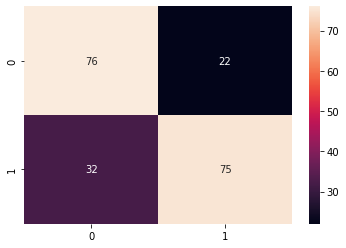

In [119]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [120]:
from sklearn.metrics import precision_score

In [121]:
precision = precision_score(Y_test, y_pred_knn)

In [122]:
print("Precision: ",precision)

Precision:  0.7731958762886598


# recall

In [123]:
from sklearn.metrics import recall_score

In [124]:
recall = recall_score(Y_test, y_pred_knn)

In [125]:
print("Recall is: ",recall)

Recall is:  0.7009345794392523


# f score

In [126]:
print((2*precision*recall)/(precision+recall))

0.7352941176470589


### bad cm

In [127]:
CM = pd.crosstab(Y_test, y_pred_knn)
CM

col_0,0,1
target,,
0,76,22
1,32,75


In [128]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## false negative rate of the model

In [129]:
fnr = FN*100/(FN+TP)
fnr

29.906542056074766

## false negative rate

In [130]:
CM = pd.crosstab(Y_test, Y_pred_knn4)
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
fnr = FN*100/(FN+TP)
fnr

NameError: name 'Y_pred_knn4' is not defined

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

dt.fit(X_train, Y_train)

y_pred_dt = dt.predict(X_test)
print(y_pred_dt)

In [ ]:
score_dt = round(accuracy_score(y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [ ]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

# Discision Tree Visualization

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

In [ ]:
from pandas import DataFrame, Series
from IPython.display import Image 
from io import StringIO
import pydotplus
from sklearn import preprocessing

In [ ]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,    
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

In [ ]:
plot_decision_tree(clf, X_train.columns,df.columns[1])

# Depth 1

In [ ]:
from sklearn import tree
HOW_DEEP_TREES = 1
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=HOW_DEEP_TREES)
clf = clf.fit(X_train, Y_train)
clf

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=0,
            splitter='best')

In [ ]:
plot_decision_tree(clf, X_train.columns,df.columns[1])

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
matrix= confusion_matrix(Y_test, y_pred_dt)

In [ ]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision = precision_score(Y_test, y_pred_dt)

In [ ]:
print("Precision: ",precision)

# recall

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall = recall_score(Y_test, y_pred_dt)

In [ ]:
print("Recall is: ",recall)

# f score

In [ ]:
print((2*precision*recall)/(precision+recall))

### bad cm style

In [ ]:
CM = pd.crosstab(Y_test, y_pred_dt)
CM

## false negative rate

In [ ]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
fnr = FN*100/(FN+TP)
fnr

# FINAL SCORE

In [ ]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=8), DecisionTreeClassifier(max_depth=3, random_state=0), LogisticRegression(), 
        GaussianNB(), RandomForestClassifier(n_estimators=100, random_state=0)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    accuracy.append(score)

In [ ]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

In [ ]:
scores = [score_lr,score_nb,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest"] 
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)



---



# F1 score(F Score)

---


## Logistic Regression
# 0.869
## Random Forest
# 0.885
## Naive Bayes
# 0.873
## KNN
# 0.707
## Decision Tree
# 0.830

# So Random Forest algorithm is the best here and Naive Bayes is the 2nd Best
## And here KNN is the worst algorithm